## For a given dataset predict number of bikes getting shared based on temperature of the day

### Data Preprocessing

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning from scratch/')
from ipynb.fs.full.ml_library import *

# importing dataset & storing it as pandas dataframe
bike_data = pd.read_csv('bike_sharing.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
bike_data = bike_data[['temp','cnt']]
bike_data.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


#### Checking for null values

In [3]:
bike_data.isna().sum()

temp    0
cnt     0
dtype: int64

In [4]:
bike_data.describe()         # observing statistical summary of columns

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


#### Checking for outliers

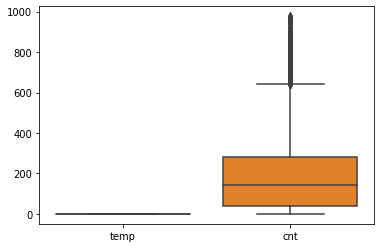

In [5]:
sns.boxplot(data=bike_data)
plt.show()

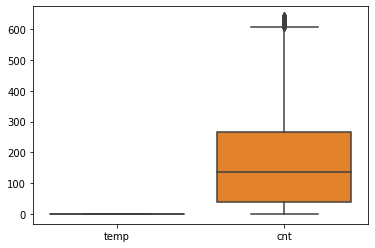

In [6]:
bike_data = remove_outliers(bike_data, ['cnt'])          # removed outliers using custom built library function
sns.boxplot(data=bike_data)
plt.show()

In [7]:
bike_data.shape          # size after outlier removal

(16874, 2)

#### Separating out feature & label columns

In [8]:
x_values = bike_data['temp'].values.reshape(-1, 1)
y_values = bike_data['cnt'].values.reshape(-1, 1)

#### Plotting temperature vs count of bikes 

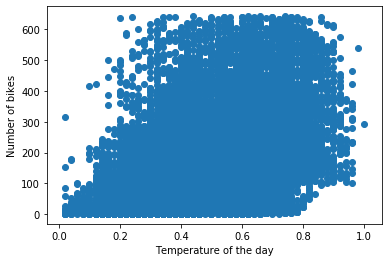

In [9]:
plt.scatter(x=x_values, y=y_values)
plt.xlabel('Temperature of the day')
plt.ylabel('Number of bikes')
plt.show()

#### Splitting dataset into train set & test set

In [10]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size = 0.7, random_state=0) 

### Buliding linear regression model

In [11]:
regressor = LinearRegression(normalize=True)       # creating object from LinearRegression class
regressor.fit(train_x_values, train_y_values)       # building linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Storing predictions for train set

In [12]:
train_prediction = regressor.predict(train_x_values)
test_prediction = regressor.predict(test_x_values)

#### Plotting linear regression model against data points

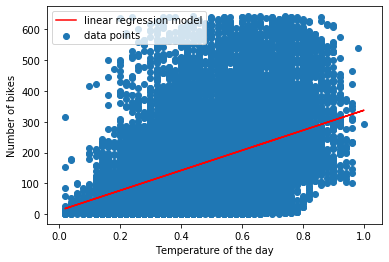

In [13]:
plt.scatter(x=x_values, y=y_values, label= 'data points')
plt.plot(train_x_values,train_prediction, 'red', label= 'linear regression model')
plt.xlabel('Temperature of the day')
plt.ylabel('Number of bikes')
plt.legend()
plt.show()

### Calculating errors

In [14]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

110.52990897340658

In [15]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

20009.815331800633

In [16]:
root_mean_sqr_error = np.sqrt(mean_sqr_error)
root_mean_sqr_error

141.45605441903373

### Evaluating model against test set

In [17]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.1591291466210507
